# Lexical Category Analysis with Empath
A way to analyze any DTRS dataset using custom lexical categories created with Empath.

In [16]:
import sys
import re
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from empath import Empath
from IPython.display import Markdown, display

In [2]:
def printmd(string):
    display(Markdown(string))

## Load DTRS datasets
Load pre-processed DTRS datasets into a dataframe

In [3]:
files = glob.glob('./output/*.txt')

df_list = []

for filename in files:
    df_file = pd.read_csv(filename, sep=';')
    df_list.append(df_file)

df = pd.concat(df_list, axis=0, ignore_index=True)
print("Read", len(files), "files and loaded", df.shape[0], "rows into the dataframe.")

Read 65 files and loaded 20902 rows into the dataframe.


In [4]:
df[0:10]

,dataset,session,speaker,utterance
0,dtrs-10,grad-2-concept-review-sharon,Steve,Next. Okay whose turn? Wilson?
1,dtrs-10,grad-2-concept-review-sharon,Wilson,Huh?
2,dtrs-10,grad-2-concept-review-sharon,Steve,"You’re talking, it’s your turn."
3,dtrs-10,grad-2-concept-review-sharon,Wilson,It’s my turn?
4,dtrs-10,grad-2-concept-review-sharon,Steve,You critique it. What’s working. Explain the...
5,dtrs-10,grad-2-concept-review-sharon,Wilson,Let me take a look. Uh. So it is uh a coat h...
6,dtrs-10,grad-2-concept-review-sharon,Steve,"OK. It makes sense. Okay, what is good about..."
7,dtrs-10,grad-2-concept-review-sharon,Wilson,I think the storyboard it make very good sense.
8,dtrs-10,grad-2-concept-review-sharon,Steve,Okay.
9,dtrs-10,grad-2-concept-review-sharon,Wilson,Yes.


## Create Custom Lexicons
Empath has three models from which to create lexical categories, one trained on a Reddit dataset, one on New York Times, and one on an open corpus of fiction. We create lexical categories from all three models and then use the one best applicable to our dataest.

In [5]:
lexicon = Empath()
movement_seed_words = ['walk', 'move', 'fly', 'roll', 'skate', 'crawl', 'swim', 'drive', 'bike', 'sail']
lexicon.create_category('movement-reddit', movement_seed_words, model="reddit", size=100)
movement_reddit = list(set(lexicon.cats['movement-reddit']))
printmd_string = "Created category with **" + str(len(movement_reddit)) + " terms** using the Reddit dataset."
printmd(printmd_string)
print("---------------------------------------------------------------------")
lexicon.create_category('movement-nytimes', movement_seed_words, model="nytimes", size=100)
movement_ny = list(set(lexicon.cats['movement-nytimes']));
printmd_string = "Created category with **" + str(len(movement_ny)) + " terms** using the New York Times dataset."
printmd(printmd_string)
print("---------------------------------------------------------------------")
lexicon.create_category('movement-fiction', movement_seed_words, model="fiction", size=100)
movement_fiction = list(set(lexicon.cats['movement-fiction']))
printmd_string = "Created category with **" + str(len(movement_fiction)) + " terms** using the Fiction dataset."
printmd(printmd_string)

["swim", "walk", "paddle", "ride", "crawl", "scoot", "paddling", "drag", "swim", "waddle", "gallop", "jump", "Swim", "feet", "fly", "pedal", "trail", "skate", "slip", "haul", "slide", "jog", "jog", "crawl", "climb_trees", "chase", "walk", "faceplant", "boat", "catch", "knuckle", "riding", "hike", "fling", "uphill", "snowboard", "swimming", "long_board", "float", "hop", "sprint", "raft", "bonk", "hike", "walk/run", "dismount", "mosey", "limp", "train", "scurry", "whack", "ditch", "skateboard", "duck", "kayak", "huck", "ski", "saunter", "wheel", "dart", "paddling", "sideways", "sail", "plow", "yank", "fly", "loaf", "dive", "head", "drive", "legs", "kayak", "town", "lumber", "lay", "step", "skateboard", "hump", "sit", "climb", "shimmy", "pound", "scoot", "trail", "zip", "soft_sand", "long_ride", "feet", "glide", "trudge", "deep_water", "skid", "strap", "beach", "putter", "maneuver"]


Created category with **84 terms** using the Reddit dataset.

---------------------------------------------------------------------
["hop", "ride", "walk", "dive", "swim", "crawl", "pedal", "sail", "race", "drive", "ski", "fly", "jump", "row", "zip", "paddle", "jog", "cruise", "climb", "glide", "hike", "go", "sprint", "circle", "bump", "move", "wander", "skate", "park", "plow", "paddling", "crash", "hurry", "travel", "chase", "sneak", "tow", "dash", "haul", "drift", "fish", "hustle", "pull", "leap", "land", "scoot", "slip", "dart", "lug", "board", "wade", "hoist", "bounce", "strap", "slide", "clamber", "gallop", "blast", "stretch", "paddled", "roll", "descend", "skis", "venture", "stagger", "stroll", "rush", "swing", "dribble", "hook", "splash", "limp", "maneuver", "tuck", "swoop", "wheel", "pack", "buckle", "trudge", "paddle", "stow", "trip", "bike", "kick", "bike", "get", "hug", "drag", "roar", "stay", "zoom", "float", "shoot", "amble", "catch", "jam", "wiggle", "sink", "suck", "sit"]


Created category with **98 terms** using the New York Times dataset.

---------------------------------------------------------------------
["move", "fly", "walk", "climb", "drive", "swim", "pull", "drag", "paddle", "crawl", "back", "skate", "ride", "push", "reach", "swing", "jump", "jog", "race", "step", "sprint", "rush", "stand", "pass", "hop", "turn", "dive", "climb", "drop", "roll", "slide", "slip", "fall", "head", "speed", "float", "throw", "crash", "stretch", "kick", "travel", "sail", "moving", "land", "paddling", "zoom", "carry", "haul", "hike", "bounce", "sweep", "chase", "trot", "run", "dash", "limp", "gallop", "lift", "scramble", "close", "crawl", "walking", "duck", "skating", "stumble", "start", "sit", "dive", "tumble", "train_tracks", "wind", "bring", "scamper", "bend", "march", "freeze", "near", "leave", "stroll", "park", "wander", "scurry", "bike", "wade", "leap", "shoot", "shift", "running", "flip", "hold"]


Created category with **87 terms** using the Fiction dataset.

In [6]:
def add_empath_measure(df, lex_category, normalize_measure=False):
    if lex_category in df.columns :
        print("Column already exists for", lex_category, ". Repopulating...")
        df = df.drop(lex_category, axis=1)
    column_index = len(df.columns)
    empath_measures = []
    for ind, utterance in enumerate(list(df['utterance'])) :
        if utterance != '' and utterance != ' ' :
            empath_measure = lexicon.analyze(utterance, categories=[lex_category],
                                                normalize=normalize_measure)[lex_category]
            empath_measures.append(empath_measure)
    df.insert(column_index, lex_category, empath_measures, True)
    return df

In [7]:
df = add_empath_measure(df, 'movement-nytimes')
df[0:10]

,dataset,session,speaker,utterance,movement-nytimes
0,dtrs-10,grad-2-concept-review-sharon,Steve,Next. Okay whose turn? Wilson?,0.0
1,dtrs-10,grad-2-concept-review-sharon,Wilson,Huh?,0.0
2,dtrs-10,grad-2-concept-review-sharon,Steve,"You’re talking, it’s your turn.",0.0
3,dtrs-10,grad-2-concept-review-sharon,Wilson,It’s my turn?,0.0
4,dtrs-10,grad-2-concept-review-sharon,Steve,You critique it. What’s working. Explain the...,0.0
5,dtrs-10,grad-2-concept-review-sharon,Wilson,Let me take a look. Uh. So it is uh a coat h...,1.0
6,dtrs-10,grad-2-concept-review-sharon,Steve,"OK. It makes sense. Okay, what is good about...",1.0
7,dtrs-10,grad-2-concept-review-sharon,Wilson,I think the storyboard it make very good sense.,0.0
8,dtrs-10,grad-2-concept-review-sharon,Steve,Okay.,0.0
9,dtrs-10,grad-2-concept-review-sharon,Wilson,Yes.,0.0


In [8]:
def round_to_multiples(x, multiples_of=5):
    base = multiples_of
    if base == 0 :
        return base
    else :
        return base * round(x/base)
    
def round2(x):
    y = round(x, 2)
    return y

def plot_measure(df, dataset, session, measure):
    df0=df[df['dataset']==dataset]
    if session != '' :
        df1=df0[df0['session']==session]
    else :
        df1 = df0
    fig = plt.figure(figsize=[10,2], dpi=300)
    col = sns.color_palette("Set2")
    sns.set_style('ticks', {'axes.linewidth': 0.5, 'axes.edgecolor':'grey', 'axes.spinecolor' : 'grey'})
    sns.set_context('paper', font_scale = 1)
    ax = sns.barplot(x=df1.index, y=measure, data=df1, hue='speaker', palette ='Set2', linewidth=0)
    data_len = df1.shape[0]
    rounding_factor = int(data_len/50)
    xlim = df1.shape[0] + 1
    if rounding_factor > 0 :
        xlist = list(np.arange(0, xlim, round_to_multiples(xlim/20, multiples_of=rounding_factor)))
    else :
        xlist = list(np.arange(0, xlim))
    ax.set_xticks(xlist)
    ax.set_xticklabels(ax.get_xticks(), fontsize=7)
    ax.set_yticklabels(map(round2, ax.get_yticks()), fontsize=7)
    ax.set_ylabel(measure, fontsize=9)
    plt.title("# words vs. # utterances: " + dataset +' | '+ session +' | '+ measure, fontsize=9)
    speakers = len(set(list(df1['speaker'])))
    legend_columns = round(speakers/4) + 1
    plt.legend(loc='best', ncol=legend_columns, borderaxespad=0.15)
    plt.savefig('./plots/'+ dataset +'-'+ session +'-'+ measure +'.pdf', bbox_inches='tight')

In [9]:
def make_regex(lex_list):
    separator = '\\b|\\b'
    reg_string = separator.join(lex_list)
    reg_string_whole_word = "\\b" + reg_string + "\\b"
    return reg_string_whole_word

def match_lexicon_terms(sentence, lexicon):
    reg_str = make_regex(lexicon)
    reg_matches = re.findall(reg_str, sentence.lower())
    reg_split = re.split(reg_str, sentence.lower())
    ind = 0
    matched_print = ""
    for split_string in reg_split:
        if ind == len(reg_matches) :
            str_to_concat = split_string
        else :
            str_to_concat = split_string + '**' + reg_matches[ind] + '**'
            ind += 1
        matched_print += str_to_concat
    return matched_print
    
def print_lines(df, dataset, session, lexicon, start, num_lines=10):
    df1 = df[df['dataset'] == dataset]
    df2 = df1[df1['session'] == session]
    speakers_list = list(df2['speaker'])
    utt = list(df2['utterance'])
    end = start + num_lines
    for ind, line in enumerate(utt[start:end]) :
        index = ind + start
        line_matched = match_lexicon_terms(line, lexicon)
        print(str(index)+' : ', end='')
        print(speakers_list[index])
        printmd(line_matched)
        print('----------')

## Dataset Information as Reference for Plotting
Down below you will see a table of all datasets and sessions. You can use them as inputs to plot the lexical categories for any one dataset and session.

In [10]:
df_data = df.drop(['speaker', 'utterance', 'movement-nytimes'], axis=1)
df_data = df_data.drop_duplicates(subset=None, keep='first', inplace=False)
df_data = df_data.reset_index()
df_data[df_data['dataset'] == 'dtrs-02'].sort_values('session')

,index,dataset,session
52,16295,dtrs-02,think-aloud
31,9231,dtrs-02,three-person-discussion


In [11]:
df_data[df_data['dataset'] == 'dtrs-07'].sort_values('session')

,index,dataset,session
10,1597,dtrs-07,crematorium-meeting-01
12,2619,dtrs-07,crematorium-meeting-02
55,17060,dtrs-07,engineers-meeting-01
61,19574,dtrs-07,engineers-meeting-02


In [12]:
df_data[df_data['dataset'] == 'dtrs-10'].sort_values('session')

,index,dataset,session
7,740,dtrs-10,grad-1-search-review-amie-jin
6,461,dtrs-10,grad-1-search-review-marlen-david
14,3950,dtrs-10,grad-1-search-review-sharon-ellen
58,18589,dtrs-10,grad-2-concept-review-amie
41,13182,dtrs-10,grad-2-concept-review-ellen
48,16058,dtrs-10,grad-2-concept-review-marlen
0,0,dtrs-10,grad-2-concept-review-sharon
9,1142,dtrs-10,grad-2-concept-review-wilson
3,319,dtrs-10,grad-3-client-review-ellen
40,13098,dtrs-10,grad-3-client-review-jin


In [13]:
df_data[df_data['dataset'] == 'dtrs-11'].sort_values('session')

,index,dataset,session
39,12996,dtrs-11,01-background-interview
36,12730,dtrs-11,02-designing-cocreation-workshops
34,11701,dtrs-11,03-iterations-on-workshop-design
21,6202,dtrs-11,04-iterations-on-cocreation-workshops
15,4184,dtrs-11,05-designing-cocreation-workshops-day-2
30,9071,dtrs-11,07-designing-cocreation-workshops-debrief-day-1
45,14696,dtrs-11,08-sharing-insights-from-cocreation-workshops-...
35,12256,dtrs-11,09-clustering-insights-cc1
28,8421,dtrs-11,10-iterations-on-cc2-design
46,15036,dtrs-11,11-linking-insights-from-cc-to-project


## Plot Occurrences
Plot Lexical categories for any dataset and session.

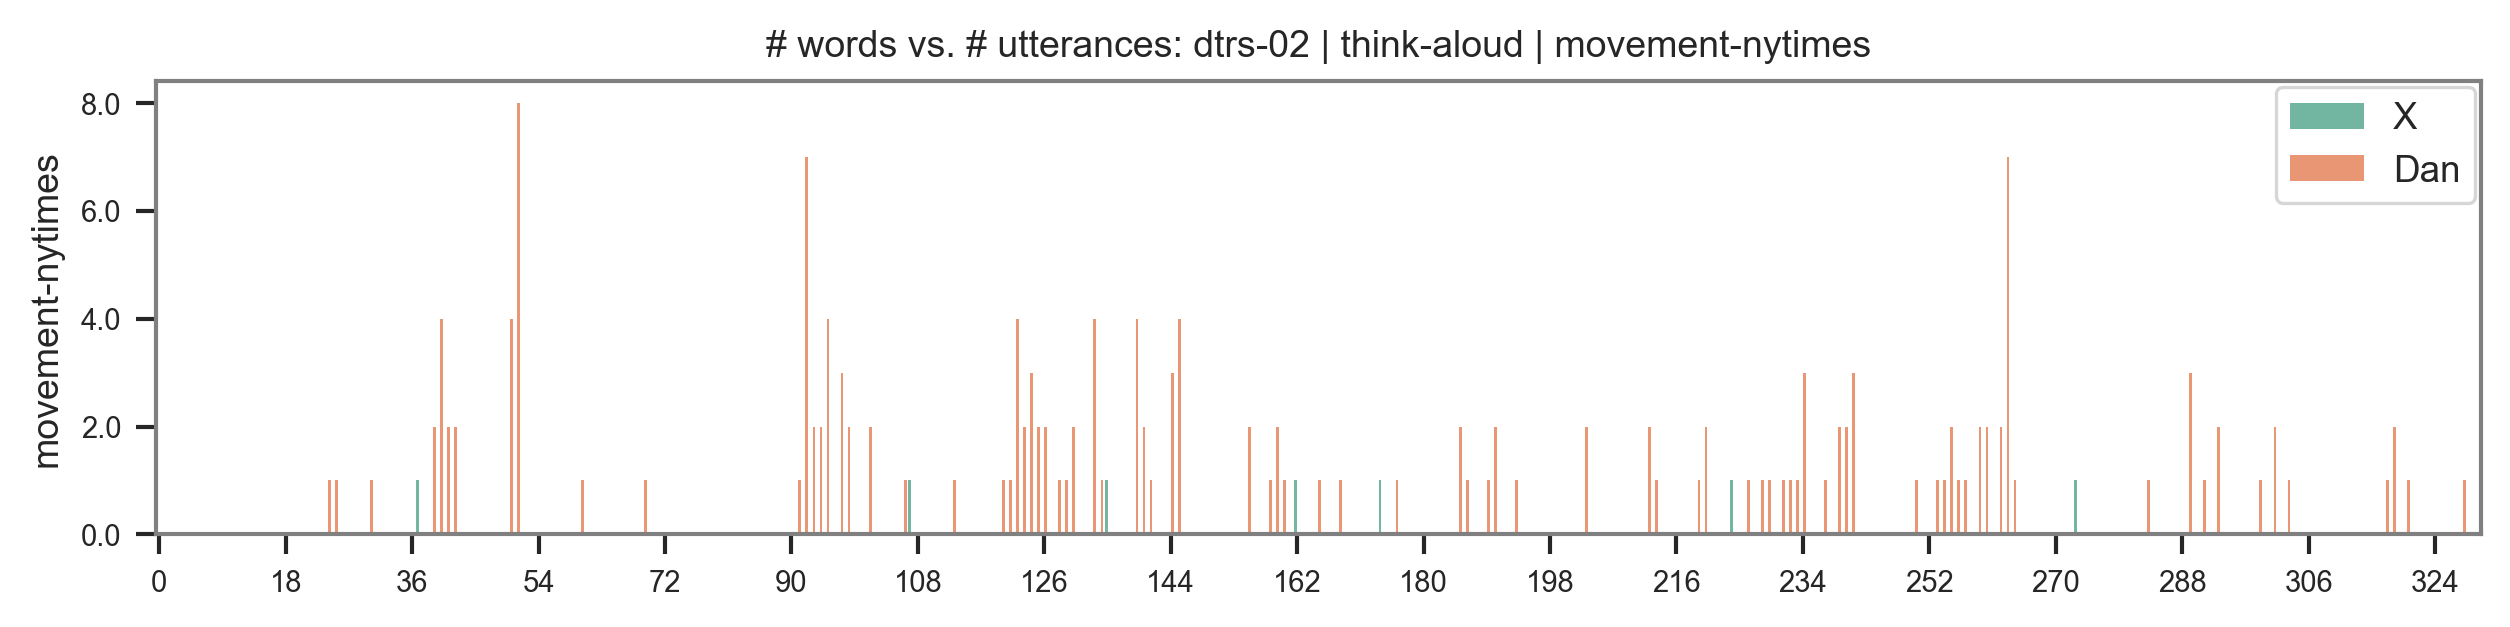

In [14]:
plot_measure(df, 'dtrs-02', 'think-aloud', 'movement-nytimes')

## Examine Specifics
Examine utterances in detail and show overlaps with terms in the lexical category.

In [15]:
print_lines(df, 'dtrs-02', 'think-aloud', movement_ny, 90, num_lines=5)

90 : Dan


blackburn design and campbell… thank you oops there we're ok alright so now i'm going to call up blackburn here (dials) yeah look er is this blackburn design yeah i'd like to talk to somebody about your em bicycle carriers. california. technical information so the phone's ringing i’ve been transferred (00:38:00)

----------
91 : Dan


to somebody here…… ok i'm going to actually., let's see .... oh., oh oh .. oh oh i haven't gotten through to the right person yet we'll see what happens here em yeah you just transferred me to somebody whose gonna talk to me about bicycle carriers they weren't there., oh i see maybe you've got right maybe you can tell me someone who could **get** me somebody who is there ok thank you., yeah maybe you can em i'm er thinking about bicycle carriers for carrying backpacks  (00:39:00)

----------
92 : Dan


on a mountain **bike** and you make various kinds you make the ones that **go** on the rear **wheel** the front **wheel** the sides., yeah the racks well i assume that i would assume that you could mount a backpack on those right...you don't make any backpack carriers specifically do you...oo...right right ok but now not all of them you could mount packs above the **bike** above the **wheel** right....i see., you don't ok well i wanted to know what's the trade off between carrying panniers on the front versus the rear, which is better on a mountain **bike** (00:40:00)

----------
93 : Dan


i see and that rear rack would be over the whe.. alongside each the rear **wheel** or above the rear **wheel** i see., above and to the side of it.. does does keeping it ...right i see ok but like for instance like like you have the expedition rack and your cross rack.. (00:41:00)

----------
94 : Dan


they're all designed so that you can mount things on top and then they just hang down the side huh...what happens if the if the centre of gravity is pretty high up above the **bike** do you have a stability problem in the rear., what happens if you did it in the front do you have it looks like you could put things high in the front or is that worse., that's the worst ok i see what about between the well there's not much space between the er in the frame i guess to put stuff ok what about the fact that it gets very wide is a mountain **bike** a problem when if you have panniers hanging down the side can people complain about that i'm i'm trying to find out what problems i'm going to have here (laugh) and pick the right...i see.. 00:42:00)

----------
